## Import Libraries

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings #Ignore all warnings
warnings.filterwarnings("ignore")

import itertools

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler, OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression, mutual_info_regression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

## Import & Join Datasets

In [2]:
clinical_data = pd.read_csv('Coding_Assignment_Files/clinical_data.csv')
demo_data = pd.read_csv('Coding_Assignment_Files/demographics.csv')
billid_data = pd.read_csv('Coding_Assignment_Files/bill_id.csv')
billamt_data = pd.read_csv('Coding_Assignment_Files/bill_amount.csv')

In [3]:
# Check Shape
print(clinical_data.shape)
print(demo_data.shape)
print(billid_data.shape)
print(billamt_data.shape)

(3400, 26)
(3000, 5)
(13600, 3)
(13600, 2)


In [4]:
# Join bill_id to bill amount by bill_id - new table name 'Bills'
# Join Bills to clinical_data by id/patient_id- new table name 'Patient Bills'
# Join Patient Bills to demographic by patient_id - new table name 'treatment_df'


In [5]:
bills_df = billid_data.merge(billamt_data, on='bill_id', how='left')
bills_df.head()

bill_id                        patient_id date_of_admission  \
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01   

         amount  
0    951.214467  
1  19900.297086  
2  12338.269972  
3   1145.372193  
4   1133.601902

In [6]:
# Change 'id' to 'patient_id'
clinical_data = clinical_data.rename(columns = {"id":'patient_id'})
clinical_data.head()

patient_id date_of_admission date_of_discharge  \
0  1d21f2be18683991eb93d182d6b2d220        2011-01-01        2011-01-11   
1  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01        2011-01-11   
2  c85cf97bc6307ded0dd4fef8bad2fa09        2011-01-02        2011-01-13   
3  e0397dd72caf4552c5babebd3d61736c        2011-01-02        2011-01-14   
4  94ade3cd5f66f4584902554dff170a29        2011-01-08        2011-01-16   

   medical_history_1  medical_history_2 medical_history_3  medical_history_4  \
0                  0                1.0                 0                  0   
1                  0                0.0                 0                  0   
2                  0                0.0                 0                  0   
3                  0                1.0                No                  0   
4                  0                0.0                No                  0   

   medical_history_5  medical_history_6  medical_history_7  ...  symptom_1  \
0                0.0                  0                  0  ...          0   
1                0.0                  0                  0  ...          0   
2                0.0                  0                  0  ...          1   
3                0.0                  1                  1  ...          1   
4                0.0                  1                  1  ...          0   

   symptom_2  symptom_3  symptom_4  symptom_5  lab_result_1  lab_result_2  \
0          0          0          1          1          13.2          30.9   
1          0          1          1          1          13.8          22.6   
2          1          1          1          0          11.2          26.2   
3          1          1          1          1          13.3          28.4   
4          1          0          1          0          12.0          27.8   

   lab_result_3  weight  height  
0         123.0    71.3   161.0  
1          89.0    78.4   160.0  
2         100.0    72.0   151.0  
3          76.0    64.4   152.0  
4          87.0    55.6   160.0  

[5 rows x 26 columns]

In [7]:
patients_df = demo_data.merge(clinical_data, on='patient_id', how='left')
patients_df.head()

patient_id  gender     race    resident_status  \
0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
3  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
4  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   

  date_of_birth date_of_admission date_of_discharge  medical_history_1  \
0    1971-05-14        2014-09-20        2014-10-04                  0   
1    1976-02-18        2014-08-08        2014-08-18                  0   
2    1982-07-03        2011-03-10        2011-03-20                  0   
3    1982-07-03        2013-07-02        2013-07-14                  0   
4    1947-06-15        2015-10-28        2015-11-10                  0   

   medical_history_2 medical_history_3  ...  symptom_1  symptom_2  symptom_3  \
0                0.0                 0  ...          1          1          0   
1                0.0                No  ...          1          1          1   
2                0.0                No  ...          0          0          1   
3                0.0                 0  ...          1          0          0   
4                1.0                 0  ...          1          1          1   

   symptom_4  symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  \
0          0          1          14.2          27.0          81.0    68.1   
1          1          1          14.3          27.2          92.0    76.5   
2          1          1          14.4          26.6          92.0    69.7   
3          1          0          18.0          26.6          92.0    66.7   
4          1          1          14.9          26.7          97.0    96.9   

   height  
0   161.0  
1   151.0  
2   175.0  
3   175.0  
4   180.0  

[5 rows x 30 columns]

In [8]:
# Join on patient_id and date of admission
treatment_df = bills_df.merge(patients_df, on=['patient_id', 'date_of_admission',], how='left')
treatment_df.head()

bill_id                        patient_id date_of_admission  \
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01   
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01   
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01   

         amount  gender    race resident_status date_of_birth  \
0    951.214467    Male  Indian     Singaporean    1976-12-19   
1  19900.297086  Female   Malay     Singaporean    1978-07-20   
2  12338.269972    Male  Indian     Singaporean    1976-12-19   
3   1145.372193  Female   Malay     Singaporean    1978-07-20   
4   1133.601902    Male  Indian     Singaporean    1976-12-19   

  date_of_discharge  medical_history_1  ...  symptom_1 symptom_2  symptom_3  \
0        2011-01-11                  0  ...          0         0          0   
1        2011-01-11                  0  ...          0         0          1   
2        2011-01-11                  0  ...          0         0          0   
3        2011-01-11                  0  ...          0         0          1   
4        2011-01-11                  0  ...          0         0          0   

   symptom_4  symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  \
0          1          1          13.2          30.9         123.0    71.3   
1          1          1          13.8          22.6          89.0    78.4   
2          1          1          13.2          30.9         123.0    71.3   
3          1          1          13.8          22.6          89.0    78.4   
4          1          1          13.2          30.9         123.0    71.3   

   height  
0   161.0  
1   160.0  
2   161.0  
3   160.0  
4   161.0  

[5 rows x 32 columns]

In [9]:
treatment_df = treatment_df.groupby(['bill_id', 'patient_id','amount'], as_index=False).apply(lambda x : x.sum())
treatment_df.head()

bill_id  \
bill_id patient_id                       amount                 
558412  54c00a685cd49f4ed59a389657af655b 6539.159300   558412   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   1219378   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   3568195   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   3722123   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   4477075   

                                                                            patient_id  \
bill_id patient_id                       amount                                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  54c00a685cd49f4ed59a389657af655b   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   a135b44a73f9e99424a91edc846185de   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   4a8da205ade786dd74c316c39dcbe99f   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   277ad90d43a1289b0bf22f9795c5c706   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   a54070aa18ab3579495a157364f70a39   

                                                     date_of_admission  \
bill_id patient_id                       amount                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-02-23   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-11-28   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-12   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-02-16   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         2012-12-03   

                                                           amount  gender  \
bill_id patient_id                       amount                             
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  6539.159300  Female   
1219378 a135b44a73f9e99424a91edc846185de 876.424366    876.424366    Male   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933    956.968933    Male   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493    836.612493  Female   
4477075 a54070aa18ab3579495a157364f70a39 397.293041    397.293041    Male   

                                                         race  \
bill_id patient_id                       amount                 
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  Chinese   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Chinese   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   Chinese   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   chinese   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   Chinese   

                                                        resident_status  \
bill_id patient_id                       amount                           
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        Singaporean   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Singapore citizen   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         Singaporean   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         Singaporean   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         Singaporean   

                                                     date_of_birth  \
bill_id patient_id                       amount                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300    1974-05-09   
1219378 a135b44a73f9e99424a91edc846185de 876.424366     1946-02-09   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933     1969-11-13   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493     1973-04-21   
4477075 a54070aa18ab3579495a157364f70a39 397.293041     1968-09-05   

                                                     date_of_discharge  \
bill_id patient_id                       amount                          
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-03-04   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-12-11   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-25   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-

In [10]:
treatment_df = treatment_df.rename_axis(index={'bill_id':'a', 'patient_id':'b', 'amount':'c'})
treatment_df.head()

bill_id  \
a       b                                c                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300   558412   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   1219378   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   3568195   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   3722123   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   4477075   

                                                                            patient_id  \
a       b                                c                                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  54c00a685cd49f4ed59a389657af655b   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   a135b44a73f9e99424a91edc846185de   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   4a8da205ade786dd74c316c39dcbe99f   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   277ad90d43a1289b0bf22f9795c5c706   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   a54070aa18ab3579495a157364f70a39   

                                                     date_of_admission  \
a       b                                c                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-02-23   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-11-28   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-12   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-02-16   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         2012-12-03   

                                                           amount  gender  \
a       b                                c                                  
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  6539.159300  Female   
1219378 a135b44a73f9e99424a91edc846185de 876.424366    876.424366    Male   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933    956.968933    Male   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493    836.612493  Female   
4477075 a54070aa18ab3579495a157364f70a39 397.293041    397.293041    Male   

                                                         race  \
a       b                                c                      
558412  54c00a685cd49f4ed59a389657af655b 6539.159300  Chinese   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Chinese   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933   Chinese   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493   chinese   
4477075 a54070aa18ab3579495a157364f70a39 397.293041   Chinese   

                                                        resident_status  \
a       b                                c                                
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        Singaporean   
1219378 a135b44a73f9e99424a91edc846185de 876.424366   Singapore citizen   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         Singaporean   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         Singaporean   
4477075 a54070aa18ab3579495a157364f70a39 397.293041         Singaporean   

                                                     date_of_birth  \
a       b                                c                           
558412  54c00a685cd49f4ed59a389657af655b 6539.159300    1974-05-09   
1219378 a135b44a73f9e99424a91edc846185de 876.424366     1946-02-09   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933     1969-11-13   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493     1973-04-21   
4477075 a54070aa18ab3579495a157364f70a39 397.293041     1968-09-05   

                                                     date_of_discharge  \
a       b                                c                               
558412  54c00a685cd49f4ed59a389657af655b 6539.159300        2013-03-04   
1219378 a135b44a73f9e99424a91edc846185de 876.424366         2013-12-11   
3568195 4a8da205ade786dd74c316c39dcbe99f 956.968933         2014-12-25   
3722123 277ad90d43a1289b0bf22f9795c5c706 836.612493         2012-

In [11]:
treatment_df = treatment_df.droplevel([0,1]).reset_index()
treatment_df.head()

c  bill_id                        patient_id date_of_admission  \
0  6539.159300   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23   
1   876.424366  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   
2   956.968933  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   
3   836.612493  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   
4   397.293041  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   

        amount  gender     race    resident_status date_of_birth  \
0  6539.159300  Female  Chinese        Singaporean    1974-05-09   
1   876.424366    Male  Chinese  Singapore citizen    1946-02-09   
2   956.968933    Male  Chinese        Singaporean    1969-11-13   
3   836.612493  Female  chinese        Singaporean    1973-04-21   
4   397.293041    Male  Chinese        Singaporean    1968-09-05   

  date_of_discharge  ...  symptom_1  symptom_2 symptom_3  symptom_4  \
0        2013-03-04  ...          0          1         0          1   
1        2013-12-11  ...          0          0         0          1   
2        2014-12-25  ...          0          1         1          1   
3        2012-02-27  ...          1          0         0          1   
4        2012-12-14  ...          1          1         1          1   

   symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  height  
0          0          14.3          26.4         113.0    81.0   161.0  
1          1          16.0          25.9          91.0    89.9   163.0  
2          1          11.9          29.9          85.0    77.8   176.0  
3          1          11.2          27.6          77.0    80.2   151.0  
4          0          15.0          27.6         108.0    87.0   175.0  

[5 rows x 33 columns]

In [12]:
treatment_df = treatment_df.drop('c', axis=1)
treatment_df.head()

bill_id                        patient_id date_of_admission       amount  \
0   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23  6539.159300   
1  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   876.424366   
2  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   956.968933   
3  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   836.612493   
4  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   397.293041   

   gender     race    resident_status date_of_birth date_of_discharge  \
0  Female  Chinese        Singaporean    1974-05-09        2013-03-04   
1    Male  Chinese  Singapore citizen    1946-02-09        2013-12-11   
2    Male  Chinese        Singaporean    1969-11-13        2014-12-25   
3  Female  chinese        Singaporean    1973-04-21        2012-02-27   
4    Male  Chinese        Singaporean    1968-09-05        2012-12-14   

   medical_history_1  ...  symptom_1 symptom_2  symptom_3  symptom_4  \
0                  0  ...          0         1          0          1   
1                  1  ...          0         0          0          1   
2                  0  ...          0         1          1          1   
3                  1  ...          1         0          0          1   
4                  1  ...          1         1          1          1   

   symptom_5  lab_result_1  lab_result_2  lab_result_3  weight  height  
0          0          14.3          26.4         113.0    81.0   161.0  
1          1          16.0          25.9          91.0    89.9   163.0  
2          1          11.9          29.9          85.0    77.8   176.0  
3          1          11.2          27.6          77.0    80.2   151.0  
4          0          15.0          27.6         108.0    87.0   175.0  

[5 rows x 32 columns]

In [13]:
profile = ProfileReport(treatment_df, title='Pandas Profile Report')
profile

In [14]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             13600 non-null  int64  
 1   patient_id          13600 non-null  object 
 2   date_of_admission   13600 non-null  object 
 3   amount              13600 non-null  float64
 4   gender              13600 non-null  object 
 5   race                13600 non-null  object 
 6   resident_status     13600 non-null  object 
 7   date_of_birth       13600 non-null  object 
 8   date_of_discharge   13600 non-null  object 
 9   medical_history_1   13600 non-null  int64  
 10  medical_history_2   13600 non-null  float64
 11  medical_history_3   13600 non-null  object 
 12  medical_history_4   13600 non-null  int64  
 13  medical_history_5   13600 non-null  float64
 14  medical_history_6   13600 non-null  int64  
 15  medical_history_7   13600 non-null  int64  
 16  preo

In [15]:
data_copy = treatment_df.copy()

## Preprocessing: Data Cleaning

### Misc. Values

In [21]:
# Replace Misc Values
treatment_df['gender'] = treatment_df['gender'].replace('m', 'Male').replace('f','Female')
treatment_df['race'] = treatment_df['race'].replace('chinese', 'Chinese')
treatment_df['resident_status'] = treatment_df['resident_status'].replace('Singapore citzen','Singaporean')
treatment_df['medical_history_3'] = treatment_df['medical_history_3'].replace('no','0').replace('yes', '1')

In [22]:
# Check
for col in treatment_df.columns:
    print(col, '\n', treatment_df[col].value_counts().head(), '\n\n')

bill_id 
 714706942     1
9962935055    1
6330446603    1
6201565961    1
8853068550    1
Name: bill_id, dtype: int64 


patient_id 
 4e46fddfa404b306809c350aecbf0f6a    16
f7914ba012897ceb6562be47f6cec84d    12
64a531972193ccf232cc47597ddb85ed    12
b2d15cda8c4e1f86ba43356434df6718    12
0eacfb2daed1f3ba2adf32e293bc05a6    12
Name: patient_id, dtype: int64 


date_of_admission 
 2014-05-24    36
2014-05-21    28
2012-08-19    28
2011-01-18    28
2015-08-21    28
Name: date_of_admission, dtype: int64 


amount 
 20213.306482    2
30839.804020    2
13948.627998    2
1012.028954     2
1787.576169     2
Name: amount, dtype: int64 


gender 
 Female    6808
Male      6792
Name: gender, dtype: int64 


race 
 Chinese    8664
Malay      2828
Indian      920
Others      732
India       456
Name: race, dtype: int64 


resident_status 
 Singaporean    10896
PR              2060
Foreigner        644
Name: resident_status, dtype: int64 


date_of_birth 
 1975-08-20    20
1979-02-09    16
1950-04-

#### Convert Datatypes from Object to Datetime and Object to Int

In [23]:
# Convert dates from Objects to Datetime
treatment_df['date_of_admission'] = pd.to_datetime(treatment_df['date_of_admission']) 
treatment_df['date_of_birth'] = pd.to_datetime(treatment_df['date_of_birth']) 
treatment_df['date_of_discharge'] = pd.to_datetime(treatment_df['date_of_discharge']) 


In [24]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bill_id             13600 non-null  int64         
 1   patient_id          13600 non-null  object        
 2   date_of_admission   13600 non-null  datetime64[ns]
 3   amount              13600 non-null  float64       
 4   gender              13600 non-null  object        
 5   race                13600 non-null  object        
 6   resident_status     13600 non-null  object        
 7   date_of_birth       13600 non-null  datetime64[ns]
 8   date_of_discharge   13600 non-null  datetime64[ns]
 9   medical_history_1   13600 non-null  int64         
 10  medical_history_2   13600 non-null  float64       
 11  medical_history_3   13600 non-null  object        
 12  medical_history_4   13600 non-null  int64         
 13  medical_history_5   13600 non-null  float64   

In [25]:
# Convert bill_id to object
treatment_df['bill_id'] = treatment_df['bill_id'].astype('str')

In [26]:
# Convert medical_history_3
treatment_df['medical_history_3'] = treatment_df['medical_history_3'].astype('float')

In [27]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bill_id             13600 non-null  object        
 1   patient_id          13600 non-null  object        
 2   date_of_admission   13600 non-null  datetime64[ns]
 3   amount              13600 non-null  float64       
 4   gender              13600 non-null  object        
 5   race                13600 non-null  object        
 6   resident_status     13600 non-null  object        
 7   date_of_birth       13600 non-null  datetime64[ns]
 8   date_of_discharge   13600 non-null  datetime64[ns]
 9   medical_history_1   13600 non-null  int64         
 10  medical_history_2   13600 non-null  float64       
 11  medical_history_3   13600 non-null  float64       
 12  medical_history_4   13600 non-null  int64         
 13  medical_history_5   13600 non-null  float64   

### Preprocessing: Feature Engineering for Anaylsis

In [30]:
# Extract Birth Year
treatment_df['year'] = pd.DatetimeIndex(treatment_df['date_of_birth']).year

# Extract Month of Admission
treatment_df['month_of_admission'] = pd.DatetimeIndex(treatment_df['date_of_admission']).month

# Calculate Length of Hospital Stay
treatment_df['length_of_stay'] = (treatment_df['date_of_discharge'] - treatment_df['date_of_admission']).dt.days

# Calculate Current Age
treatment_df['current_age'] = ((treatment_df['date_of_admission'] - treatment_df['date_of_birth']))/np.timedelta64(1, 'Y')

In [31]:
treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bill_id             13600 non-null  object        
 1   patient_id          13600 non-null  object        
 2   date_of_admission   13600 non-null  datetime64[ns]
 3   amount              13600 non-null  float64       
 4   gender              13600 non-null  object        
 5   race                13600 non-null  object        
 6   resident_status     13600 non-null  object        
 7   date_of_birth       13600 non-null  datetime64[ns]
 8   date_of_discharge   13600 non-null  datetime64[ns]
 9   medical_history_1   13600 non-null  int64         
 10  medical_history_2   13600 non-null  float64       
 11  medical_history_3   13600 non-null  float64       
 12  medical_history_4   13600 non-null  int64         
 13  medical_history_5   13600 non-null  float64   

In [33]:
treatment_df.head()

bill_id                        patient_id date_of_admission       amount  \
0   558412  54c00a685cd49f4ed59a389657af655b        2013-02-23  6539.159300   
1  1219378  a135b44a73f9e99424a91edc846185de        2013-11-28   876.424366   
2  3568195  4a8da205ade786dd74c316c39dcbe99f        2014-12-12   956.968933   
3  3722123  277ad90d43a1289b0bf22f9795c5c706        2012-02-16   836.612493   
4  4477075  a54070aa18ab3579495a157364f70a39        2012-12-03   397.293041   

   gender     race resident_status date_of_birth date_of_discharge  \
0  Female  Chinese     Singaporean    1974-05-09        2013-03-04   
1    Male  Chinese     Singaporean    1946-02-09        2013-12-11   
2    Male  Chinese     Singaporean    1969-11-13        2014-12-25   
3  Female  Chinese     Singaporean    1973-04-21        2012-02-27   
4    Male  Chinese     Singaporean    1968-09-05        2012-12-14   

   medical_history_1  ...  symptom_5  lab_result_1  lab_result_2  \
0                  0  ...          0          14.3          26.4   
1                  1  ...          1          16.0          25.9   
2                  0  ...          1          11.9          29.9   
3                  1  ...          1          11.2          27.6   
4                  1  ...          0          15.0          27.6   

   lab_result_3  weight  height  year  month_of_admission  length_of_stay  \
0         113.0    81.0   161.0  1974                   2              -9   
1          91.0    89.9   163.0  1946                  11             -13   
2          85.0    77.8   176.0  1969                  12             -13   
3          77.0    80.2   151.0  1973                   2             -11   
4         108.0    87.0   175.0  1968                  12             -11   

   current_age  
0    38.796142  
1    67.801529  
2    45.079639  
3    38.823521  
4    44.244577  

[5 rows x 36 columns]

## EDA & Hypothesis Testing

1. Hospital Admission is higher in the winter months.

In [34]:
# 

2. Foreigners are charged more for medical visits.

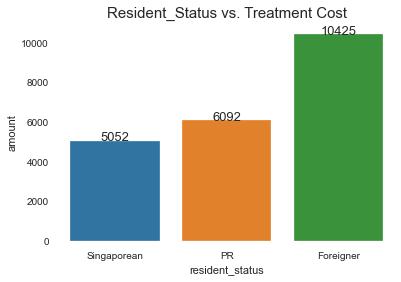

In [35]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(int(p.get_height()))
            ax.text(_x, _y, value, ha="center", size=13) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

ax = sns.barplot(x='resident_status', y='amount', data=treatment_df, ci=None)
ax.set_title('Resident_Status vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

In [50]:
def show_boxplot_values(a,b):
    ax = sns.boxplot(x=a, y=b, data=treatment_df)
    ax.set_title('Homes with View vs. Price', fontsize = 13)

    medians = treatment_df.groupby([a])[b].median().astype(int)
    vertical_offset = treatment_df[b].median() * 0.1

    for xtick in ax.get_xticks():
        ax.text(xtick, medians[xtick] + vertical_offset, 
                                        medians[xtick], horizontalalignment='center', size=14, color='black', weight='bold')

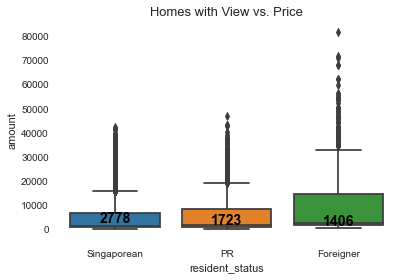

In [51]:
show_boxplot_values(a = 'resident_status', b = 'amount')

3. Preop Medication vs Cost of Treatment

In [ ]:
# ax = sns.barplot(x='preop', y='amount', data=treatment_df, ci=None)
# ax.set_title('Resident_Status vs. Treatment Cost', fontsize = 15)
# show_values_on_bars(ax)

4. Age vs. Treatment Cost

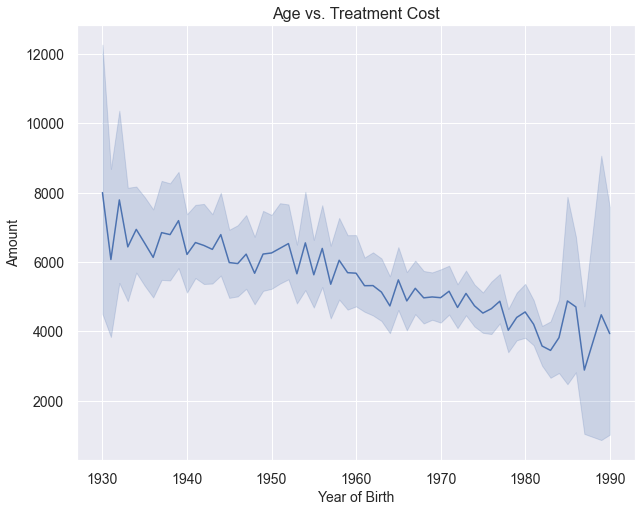

In [66]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.lineplot(data=treatment_df, x='year', y='amount')
ax.axes.set_title('Age vs. Treatment Cost', fontsize=16)
ax.set_xlabel('Year of Birth', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(labelsize=14)

5. Weight vs. Amount by Gender

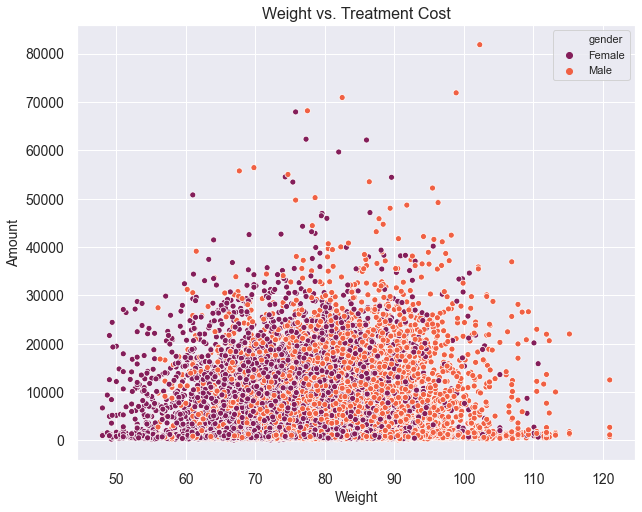

In [67]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.scatterplot(x='weight', y='amount', data=treatment_df, hue='gender', palette='rocket')
ax.axes.set_title('Weight vs. Treatment Cost', fontsize=16)
ax.set_xlabel('Weight', fontsize=14)
ax.set_ylabel('Amount', fontsize=14)
ax.tick_params(labelsize=14)

In [68]:
treatment_df['month_of_admission'] = treatment_df.month_of_admission.astype('str')

In [ ]:
ax = sns.barplot(x='month_of_admission', y='amount', data=treatment_df, ci=None, order=treatment_df.sort_values('amount').month_of_admission)
ax.set_title('Month of Admission vs. Treatment Cost', fontsize = 15)
show_values_on_bars(ax)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7feea6a3f8c8> (for post_execute):


KeyboardInterrupt: 